<a href="https://colab.research.google.com/github/Sopralapanca/TwitterDataset-DM-Project/blob/develop/DataMining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TESTO DEL PROGETTO**

Task 1.1: Data Understanding

Explore the dataset with the analytical tools studied and write a concise “data understanding”
report assessing data quality, the distribution of the variables and the pairwise correlations.
Subtasks of DU:

1. Data semantics for each feature that is not described above and the new one defined
by the team
2. Distribution of the variables and statistics
3. Assessing data quality (missing values, outliers, duplicated records, errors)
4. Variables transformations
5. Pairwise correlations and eventual elimination of redundant variables



DALLE SLIDE DATA UNDERSTANDING: [slide](http://didawiki.cli.di.unipi.it/lib/exe/fetch.php/magistraleinformatica/dmi/2-data_understanding.pdf)

Find answers to the questions
1. What kind of attributes do we have?
2. How is the data quality?
3. Does a visualiza4on helps?
4. Are attributes correlated?
5. What about outliers?
6. How are missing values handled?
7. Do we need to extract other attributes



Task 1.2: Data Preparation

Improve the quality of your data and prepare it by extracting new features interesting for
describing the user and his/her behavior derived from the information collected from the
tweets.
Examples of indicators to be computed are:
1. How many tweets were published by the user?
2. How many tweets are published by the user in a given period of time?
3. Total number of tweets
4. Total number of likes and comments
5. Ratio between the number of tweets and the number of likes
6. Entropy of the user
7. Average length of the tweets per user
8. Average number of special characters in the tweets per user

DALLE SLIDE DATA PREPARATION:[slide](http://didawiki.cli.di.unipi.it/lib/exe/fetch.php/magistraleinformatica/dmi/3-data_preparation.pdf)

0. select attributes,
1. reduce the data dimension,
2. select records,
3. treat missing values,
4. treat outliers,
5. integrate, unify and transform data
7. improve data quality

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

## Downloading the dataset and load data into dataframe

In [2]:
users_fileid = "16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR"
tweets_fileid = "1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe"

!gdown --id $users_fileid
!gdown --id $tweets_fileid

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=16b7Gbe69-SaVzGc1x3s3s7b8lzHgd5BR
To: /content/users.csv
100% 641k/641k [00:00<00:00, 140MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1qYoicySRBbLi9Y8ZytMEi9ee2dIhxxUe
To: /content/tweets.csv
100% 1.86G/1.86G [00:26<00:00, 70.0MB/s]


In [3]:
max_rows = 0
 
if max_rows != 0:
  tweets_df = pd.read_csv("./tweets.csv", nrows=max_rows)
  users_df = pd.read_csv("./users.csv")
else:
  tweets_df = pd.read_csv("./tweets.csv")
  users_df = pd.read_csv("./users.csv")


# **Data Understanding**

---



## Data Semantics

USERS CSV

1. User Id: a unique identifier of the user
2. Statues Count: the count of the tweets made by the user at the moment of data
crawling
3. Lang: the user’s language selected
4. Created at: the timestamp in which the profile was created
5. Label: a binary variable that indicates if a user is a bot or a genuine user

TWEETS CSV

1. ID: a unique identifier for the tweet
2. User Id: a unique identifier for the user who wrote the tweet
3. Retweet count: number of retweets for the tweet in analysis
4. Reply count: number of reply for the tweet in analysis
5. Favorite count: number of favorites (likes) received by the tweet
6. Num hashtags: number of hashtags used in the tweet
7. Num urls: number of urls in the tweet
8. Num mentions: number of mentions in the tweet
9. Created at: when the tweet was created
10. Text: the text of the tweet

#### Tweet.csv informations

In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


In [5]:
tweets_df.head(5)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
2,461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
3,528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
4,575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [6]:
print("In the tweet.csv file there are",len(tweets_df), "tweets")

In the tweet.csv file there are 13664696 tweets


#### User.csv informations

In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [8]:
users_df.head(5)

,id,name,lang,bot,created_at,statuses_count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [9]:
print("In the user.csv file there are",len(users_df), "users")

In the user.csv file there are 11508 users


#### Checking if there are any missing values

In [10]:
tweets_df.isna().any()

id                 True
user_id            True
retweet_count      True
reply_count        True
favorite_count     True
num_hashtags       True
num_urls           True
num_mentions       True
created_at        False
text               True
dtype: bool

In [11]:
users_df.isna().any()

id                False
name               True
lang              False
bot               False
created_at        False
statuses_count     True
dtype: bool

#### Counting NaN and unique values


In [12]:
def nan_unique_count(df: DataFrame):
  print('| {:>15} | {:>15}| {:>15} |'.format(*["column", "unique values", "NaN" ]))
  print('------------------------------------------------------')
  for col in df.columns:
    print('| {:>15} | {:>15}| {:>15} |'.format(*[col, len(df[col].unique()), df[col].isna().sum() ]))

In [13]:
nan_unique_count(tweets_df)

|          column |   unique values|             NaN |
------------------------------------------------------
|              id |        11672136|               2 |
|         user_id |          222286|          217283 |
|   retweet_count |          229168|          437134 |
|     reply_count |          158620|          647878 |
|  favorite_count |          158764|          647542 |
|    num_hashtags |          104780|         1057524 |
|        num_urls |          157146|          648623 |
|    num_mentions |          131539|          854165 |
|      created_at |         8127084|               0 |
|            text |         6778479|          537721 |


In [14]:
nan_unique_count(users_df)

|          column |   unique values|             NaN |
------------------------------------------------------
|              id |           11508|               0 |
|            name |           11361|               1 |
|            lang |              26|               0 |
|             bot |               2|               0 |
|      created_at |           11423|               0 |
|  statuses_count |            3837|             399 |


In [15]:
tweets_df.describe()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
count,13664694,13447413,13227562,13016818,13017154,12607172,13016073,12810531,13664696,13126975
unique,11672135,222285,229167,158619,158763,104779,157145,131538,8127084,6778478
top,dmy,497404180,0,0,0,0,0,0,2020-04-04 03:43:02,"Ci sedemmo dalla parte del torto, visto che tu..."
freq,14,4600,9419784,11790440,9467209,10470209,9894198,7561627,133,6932


In [16]:
users_df.describe()

,id,bot,statuses_count
count,1.150800e+04,11508.000000,11109.000000
mean,1.274517e+09,0.531456,5883.312359
std,9.354135e+08,0.499031,19073.007305
min,6.780330e+05,0.000000,0.000000
25%,4.663594e+08,0.000000,41.000000
50%,1.128643e+09,1.000000,68.000000
75%,2.357148e+09,1.000000,2916.000000
max,3.164942e+09,1.000000,399555.000000


As shown above there are some null values inside the two dataframes. Furthermore, the type of the column values is 'object' even for columns that should only have numeric values such as 'id', 'user_id' and others. This means that some values in the respective columns are not integers but strings or something else. The data is therefore to be cleaned.

## Checking anomalies, outliers... 

Anomalies on numeric fields

In [17]:
# checking non-numeric values inside tweets df
columns = ["id", "user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

for col in columns:
    try:
        pd.to_numeric(tweets_df[col], errors='raise')
    except Exception as e:
      print(f"column: {col} error: {e}")

column: id error: Unable to parse string "iylbzyeiw" at position 32
column: user_id error: Unable to parse string "nviem1q" at position 84
column: retweet_count error: Unable to parse string "04fzba6h4f" at position 75
column: reply_count error: Unable to parse string "0ngi" at position 105
column: favorite_count error: Unable to parse string "ai6" at position 42
column: num_hashtags error: Unable to parse string "2wtmdqfavz" at position 49
column: num_urls error: Unable to parse string "626z3" at position 273
column: num_mentions error: Unable to parse string "qdrybz8m1f" at position 202


In [18]:
# checking correct datetime in tweets df and user df

try:
  pd.to_datetime(tweets_df["created_at"], errors='raise')
except Exception as e:
  print(e)

try:
  pd.to_datetime(users_df["created_at"], errors='raise')
except Exception as e:
  print(e)

# no error in datetime format has been found

Assigning correct type to attribute

In [19]:
# covert tweets_df columns from object to numeric. 
# If a value can't be converted to integer a NaN is inserted

columns = ["id", "user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

for col in columns:
    tweets_df[col]=pd.to_numeric(tweets_df[col], errors='coerce', downcast='integer')

tweets_df["created_at"]=pd.to_datetime(tweets_df["created_at"], errors='coerce', yearfirst=True)

users_df["created_at"]=pd.to_datetime(users_df["created_at"], errors='coerce', yearfirst=True)

In [21]:
# checking min and max for each column to see if there are outilers, using descrive
users_df.describe()

,id,bot,statuses_count
count,1.150800e+04,11508.000000,11109.000000
mean,1.274517e+09,0.531456,5883.312359
std,9.354135e+08,0.499031,19073.007305
min,6.780330e+05,0.000000,0.000000
25%,4.663594e+08,0.000000,41.000000
50%,1.128643e+09,1.000000,68.000000
75%,2.357148e+09,1.000000,2916.000000
max,3.164942e+09,1.000000,399555.000000


In [20]:
tweets_df.describe()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.323083e+07,1.323080e+07,13039240.0,12855192.0,1.285660e+07,1.250102e+07,1.285574e+07,1.267671e+07
mean,inf,2.267436e+289,inf,inf,5.444675e+204,5.599544e+146,7.778625e+202,4.733091e+90
std,NaN,inf,NaN,NaN,inf,1.979818e+150,inf,1.685187e+94
min,3.460000e+02,0.000000e+00,0.0,0.0,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.594485e+17,2.328048e+08,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.231170e+17,4.680803e+08,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.767656e+17,1.228015e+09,1.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,inf,3.000000e+296,inf,inf,7.000000e+211,7.000000e+153,1.000000e+210,6.000000e+97


As we have seen there are of very high maximum values within both dataframes. The 75% percentile of retweet count reply count favorite count num urls and numr mention are <=1 this means that most of the tweets have no replies, likes, url hashtags or other

Anomalies on datetime

In [ ]:
# FARE MEGLIO QUESTA PARTE,
# PLOTTARE GRAFICI CHE MOSTRANO UTENTI E TWEET CREATI PRIMA DEL 2006 E DOPO IL 2020

# for each value in column created_at
# outliers for tweet creation datetime

count_after = 0
count_before = 0

# da sostituire il today, mettere fino ad aprile 2020
today = pd.to_datetime("today")
min = pd.to_datetime("2006-03-21")


for id,date in zip(tweets_df["id"],tweets_df["created_at"]):
  
    #check date after today
    if date > today:
        #print("id: ",id," date: ",date)
        count_after += 1
    #check date befor march 2006
    elif date < min:
        #print("id: ", id, " date: ", date)
        count_before += 1
    
  
print("Number of tweets with date after today: ",count_after)
print("Number of tweets with date before the creation of Twitter: ",count_before)

# DA FINIRE IL CHECK DEGLI OUTLIER PER OGNI FEATURE?


Number of tweets with date after today:  48639
Number of tweets with date before the creation of Twitter:  48600


Anomalies on languages

In [22]:
# anomalies in language
print(users_df["lang"].unique())

['en' 'it' 'fr' 'ru' 'es' 'tr' 'en-gb' 'pt' 'nl' 'id' 'zh-tw' 'ja' 'de'
 'ko' 'en-AU' 'da' 'ar' 'en-GB' 'Select Language...' 'zh-TW' 'zh-cn' 'pl'
 'el' 'fil' 'sv' 'xx-lc']


# **Data Preparation**
---



## Data Quality & Data Cleaning

commento: nelle slide di data understanding mette il data cleaning nella fase di data undestanding, nelle slide di data preparation lo rimette come treat missing values and outliers. Per ora lascio data quality and cleaning sotto data preparation, nel caso si sposta su nel data undestanding

#### Removing duplicates

In this part we check for duplicates, missing values and outliers. SCRIVERE ALTRO

In [ ]:
def find_and_remove_duplicates(df: DataFrame, dataframe_name):
    original_lenght = len(df)
    print(f"Len of {dataframe_name} before cleaning: {original_lenght}")

    df.drop_duplicates(inplace=True)
    new_lenght = len(df)

    count = original_lenght - new_lenght
    print(f"duplicates removed from {dataframe_name} file: \t{count}")
    print(f"Len of {dataframe_name} after cleaning: {new_lenght}")
    print(f"We have {round((count/original_lenght)*100,4)}% of duplicates in {dataframe_name} file\n")

find_and_remove_duplicates(tweets_df, "tweets_df")
find_and_remove_duplicates(users_df, "users_df")

Len of tweets_df before cleaning: 13664696
duplicates removed from tweets_df file: 	1952099
Len of tweets_df after cleaning: 11712597
We have 0.1429% of duplicates in tweets_df file

Len of users_df before cleaning: 11508
duplicates removed from users_df file: 	0
Len of users_df after cleaning: 11508
We have 0.0% of duplicates in users_df file



#### Removing NaN

In [ ]:
#nan_unique_count(tweets_df, "tweets_df")
tweets_df.dropna(subset=['text'], inplace=True)
#nan_unique_count(tweets_df, "tweets_df")

# possiamo anche sostituire il NaN nel testo con stringa vuota?

Per evitare di eliminare record importanti dal dataset decidiamo di sostituire valori NaN degli attributi che rappresentano dei contatori con valori negativi non presenti del dataset

In [ ]:
#ho sostituito i valori NaN nello colonne columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] con un valore negativo per non eliminare la riga
#da fare anche per lo user dataframe
tweets_df[columns] = tweets_df[columns].fillna(value=-100)
tweets_df.replace([np.inf, -np.inf], -100, inplace=True)

# creare id fantoccio
tweets_df["id"] = tweets_df["id"].fillna(method="ffill")

# per user_df se il valore nella colonna è nan al momento droppo la linea, se si trova altro si può modificare in seguito
tweets_df.dropna(inplace=True)

# most of user_id are not integer, dropping these line we reached almost the number of users we have in user_df 

nan_unique_count(tweets_df)

|          column |   unique values|             NaN |
------------------------------------------------------
|              id |        10606605|               0 |
|         user_id |           12077|               0 |
|   retweet_count |           45786|               0 |
|     reply_count |             605|               0 |
|  favorite_count |            1486|               0 |
|    num_hashtags |             344|               0 |
|        num_urls |             422|               0 |
|    num_mentions |             429|               0 |
|      created_at |         8103097|               0 |
|            text |         6778478|               0 |


In [ ]:
tweets_df.loc[tweets_df['favorite_count'] == -100].value_counts()

id             user_id       retweet_count  reply_count  favorite_count  num_hashtags  num_urls  num_mentions  created_at           text                                                                                                  
-1.000000e+02  1.774554e+08  -100.0         -100.0       -100.0          -100.0         0.0       2.0          2020-04-06 15:12:11  @briOKC @NewsOK                                                                                           1
 5.726603e+16  1.273204e+09   0.0            0.0         -100.0          -100.0        -100.0    -100.0        2018-12-18 12:22:27  Il risultato dei programmi fatti con cura Ã¨ sempre scambiato per fortuna dai cretini Dashiell Hammett    1
 5.726460e+16  9.546324e+07   0.0            0.0         -100.0          -100.0         0.0       1.0          2020-03-23 16:10:22  @wintrzz hahaachahaistalkeraebchnekelyekoitoideahonachahyenanaseerhihoga                                  1
 5.726236e+16  4.653759e+08  -100.0         -

In [ ]:
#assign int to colums in tweets
columns = ["id", "user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

for col in columns:
    tweets_df[col]=tweets_df[col].astype(int)

#### Clean the language column in the users dataframe

In [ ]:
users_df['lang'] = users_df['lang'].str.replace('en-gb', 'en')
users_df['lang'] = users_df['lang'].str.replace('en-GB', 'en')
users_df['lang'] = users_df['lang'].str.replace('en-AU', 'en')

users_df['lang'] = users_df['lang'].str.replace('zh-TW', 'zh-tw')
users_df['lang'] = users_df['lang'].str.replace('zh-tw', 'zh')
users_df['lang'] = users_df['lang'].str.replace('zh-cn', 'zh')

['en' 'it' 'fr' 'ru' 'es' 'tr' 'pt' 'nl' 'id' 'zh' 'ja' 'de' 'ko' 'da'
 'ar' 'Select Language...' 'pl' 'el' 'fil' 'sv' 'xx-lc']


## Distribution of variables - DA FARE


INSERIRE VARI PLOT DEI DATI CHE ABBIAMO FATTO

CHRISTIAN



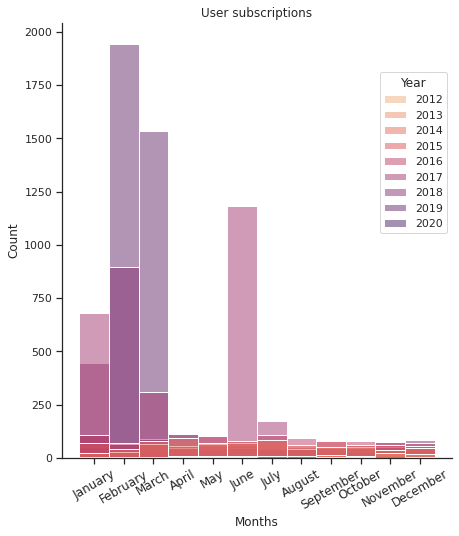

In [ ]:
#@title
import seaborn as sns
import matplotlib as mpl

# mpl.use('TkAgg')
import matplotlib.pyplot as plt
import calendar
  
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)

# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    users_df,
    x=users_df['created_at'].dt.month, hue=users_df['created_at'].dt.year,
    multiple='layer',
    log_scale=False,
    discrete=True,
    palette='flare'
).set(title="User subscriptions")

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.8, 0.9), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                    fontdict={'horizontalalignment': 'center', 'fontsize': 12, 'rotation': 30})
plt.show()

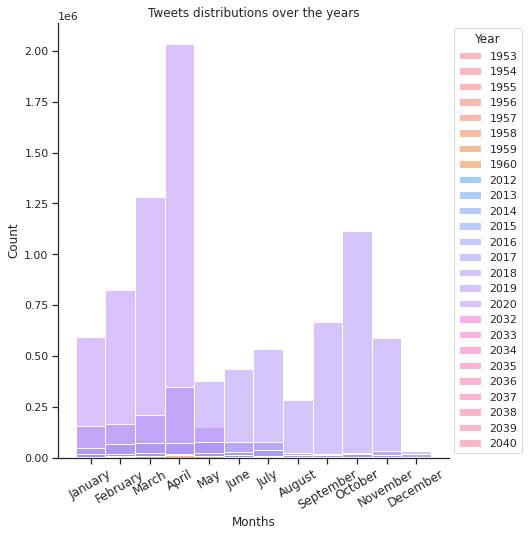

In [ ]:
#@title
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)

# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    tweets_df,
    x=tweets_df['created_at'].dt.month, hue=tweets_df['created_at'].dt.year,
    multiple='layer',
    log_scale=False,
    discrete=True,
    palette='husl'
).set(title="Tweets distributions over the years")

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                    fontdict={'horizontalalignment': 'center', 'fontsize': 12, 'rotation': 30})
plt.show()

In [ ]:
tweets_df['user_id'].value_counts().sort_values(ascending=False)

497404180     3920
1693274954    3906
157029836     3903
164940888     3903
491630583     3902
              ... 
126216653        1
1723             1
898              1
707              1
261              1
Name: user_id, Length: 12066, dtype: int64

In [ ]:
tweets_df['id'].astype(str).str.len().value_counts().sort_values(ascending=False)

18    9958804
17     171209
10     127161
11     123921
16     114232
15     113880
9      113573
8      113394
7       11449
14      11293
6        1178
13       1049
12        129
5         114
4          14
3           2
Name: id, dtype: int64

In [ ]:
tweets_df['user_id'].astype(str).str.len().value_counts().sort_values(ascending=False)

9     6308892
10    3025522
8     1454375
7       52841
6       19134
3         418
4         119
2          42
5          33
1          12
20         12
11          2
Name: user_id, dtype: int64

In [ ]:
tweets_df['retweet_count'].value_counts().describe()

count    4.577900e+04
mean     2.372573e+02
std      3.561424e+04
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      7.542784e+06
Name: retweet_count, dtype: float64

In [ ]:
tweets_df['reply_count'].value_counts().describe()

count    5.930000e+02
mean     1.831602e+04
std      4.287483e+05
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.043337e+07
Name: reply_count, dtype: float64

In [ ]:
tweets_df['favorite_count'].min()

-9223372036854775808

## Merge
TODO: breve descrizione del perchè mergiamo

In [ ]:
# first of all merge the two dataframe, checking lenght of df after and before merging
# so that we can assure that no rows have been discarded

users_df.rename(columns = {'id':'user_id'}, inplace = True)

print(len(tweets_df))
merged_df = tweets_df.merge(users_df,on='user_id', how='outer')
print(len(tweets_df))

10861402
10861402


In [ ]:
print(merged_df.head(5))

                   id    user_id  retweet_count  reply_count  favorite_count  \
0  509354017856950336  327746321              0            0               0   
1  523891871761039360  327746321              0            0               0   
2  528202577788559360  327746321              0            0               0   
3  530119198710964160  327746321              0            0               0   
4  520435124048248832  327746321              0            0               0   

   num_hashtags  num_urls  num_mentions        created_at_x  \
0             0         0             0 2019-09-11 14:53:55   
1             0         1             0 2019-10-21 17:42:10   
2             0         0             0 2019-11-02 15:11:22   
3             0         1             0 2019-11-07 22:07:20   
4             0         1             0 2019-10-12 04:46:17   

                                                text                name lang  \
0  If man is a little lower than angels, then ang...  The A

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10861402 entries, 0 to 10861401
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   user_id         int64         
 2   retweet_count   int64         
 3   reply_count     int64         
 4   favorite_count  int64         
 5   num_hashtags    int64         
 6   num_urls        int64         
 7   num_mentions    int64         
 8   created_at_x    datetime64[ns]
 9   text            object        
 10  name            object        
 11  lang            object        
 12  bot             float64       
 13  created_at_y    datetime64[ns]
 14  statuses_count  float64       
dtypes: datetime64[ns](2), float64(2), int64(8), object(3)
memory usage: 1.3+ GB


In [ ]:
nan_unique_count(merged_df)

# i valori unici nel campo user_id nel tweets dataframe sono 12066 mentre la lunghezza dello user_df è 11508 
# questo significa che sono presenti user_id nel dataframe tweets_df che non sono presenti nello user_df
# quando mergiamo i due dataset troviamo quindi dei NaN per gli user_id che non erano presenti nello user_df
# CHE CI FACCIAMO CON QUESTI NAN?


|          column |   unique values|             NaN |
------------------------------------------------------
|              id |        10606605|               0 |
|         user_id |           12066|               0 |
|   retweet_count |           45779|               0 |
|     reply_count |             593|               0 |
|  favorite_count |            1480|               0 |
|    num_hashtags |             335|               0 |
|        num_urls |             414|               0 |
|    num_mentions |             424|               0 |
|    created_at_x |         8103097|               0 |
|            text |         6778478|               0 |
|            name |           11361|            3645 |
|            lang |              22|             693 |
|             bot |               3|             693 |
|    created_at_y |           11424|             693 |
|  statuses_count |            3837|           43168 |


In [ ]:
merged_df.head(2)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at_x,text,name,lang,bot,created_at_y,statuses_count
0,509354017856950336,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang...",The Amazing Rhythm,en,1.0,2016-07-03 02:37:46,12288.0
1,523891871761039360,327746321,0,0,0,0,1,0,2019-10-21 17:42:10,Read the Biography of Don Henley http://t.co/...,The Amazing Rhythm,en,1.0,2016-07-03 02:37:46,12288.0


## Indicators

1. How many tweets were published by the user?
2. How many tweets are published by the user in a given period of time?
3. Total number of tweets
4. Total number of likes and comments
5. Ratio between the number of tweets and the number of likes
6. Entropy of the user
7. Average length of the tweets per user
8. Average number of special characters in the tweets per user


#### Indicator 1 : How many tweets were published by the user?

In [ ]:
merged_df['user_id'].value_counts().sort_values(ascending=False)

497404180     3920
1693274954    3906
157029836     3903
164940888     3903
491630583     3902
              ... 
126216653        1
1723             1
898              1
707              1
261              1
Name: user_id, Length: 12066, dtype: int64

#### Indicator 2 : How many tweets are published by the user in a given period of time?

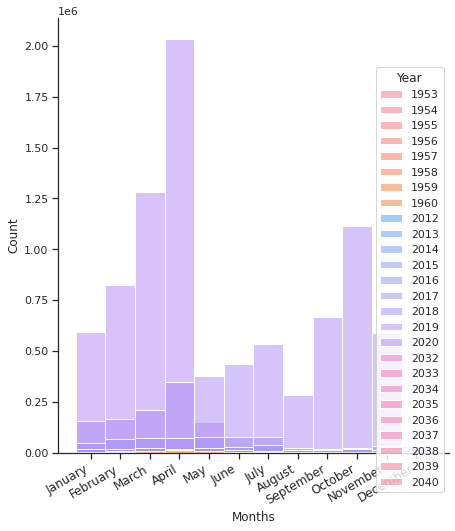

In [ ]:
# How many tweets are published by the user in a given period of time?

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)

# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    merged_df,
    x=merged_df['created_at_x'].dt.month, hue=merged_df['created_at_x'].dt.year,
    multiple='layer',
    palette='husl',
    log_scale=False,
    discrete=True,
)

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.8, 0.9), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                        fontdict={'horizontalalignment': 'right', 'fontsize': 12, 'rotation': 30})
plt.show() 

#### Indicator 3 : Total number of tweets

In [ ]:
print("After cleaning we have",len(tweets_df), "tweets")

After cleaning we have 10861402 tweets


#### Indicator 4: Total number of likes and comments (TODO)

In [ ]:
#TODO

#### Indicator 5: Ratio between the number of tweets and the number of likes (TODO)

In [ ]:
#TODO

#### Indicator 6: Entropy of the user (TODO)

In [ ]:
#TODO

#### Indicator 7: Average length of the tweets per user (TODO)

In [ ]:
#TODO

#### Indicator 8: Average number of special characters in the tweets per user (TODO)

In [ ]:
#TODO

#### Custom Indicator 9 : Number of tweets that have at least one hashtag

Number of tweets with no hashtags: 			 9152621
Number of tweets that have at least one hashtag: 	 1171047


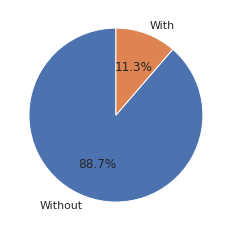

In [ ]:
len_tweet_without_hashtags = len(merged_df[merged_df['num_hashtags'] == 0])
len_tweet_with_at_least_one_hashtag = len(merged_df[merged_df['num_hashtags'] > 0])

print("Number of tweets with no hashtags: \t\t\t", len_tweet_without_hashtags)
print("Number of tweets that have at least one hashtag: \t",len_tweet_with_at_least_one_hashtag)

labels = 'Without', 'With'
sizes = [len_tweet_without_hashtags, len_tweet_with_at_least_one_hashtag]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.show()

#### Custom Indicator 10 : Language of tweets

The value      en was found 8704761 times 
The value      it was found 1586522 times 
The value      es was found  293910 times 
The value      ja was found   67646 times 
The value      pt was found   43331 times 
The value      fr was found   40441 times 
The value      zh was found   23844 times 
The value      de was found   20426 times 
The value      nl was found   17885 times 
The value      id was found   17554 times 
The value      ru was found   14002 times 
The value      tr was found    8926 times 
The value      ko was found    4705 times 
The value      pl was found    3534 times 
The value      el was found    3513 times 
The value     fil was found    3457 times 
The value      da was found    2373 times 
The value   xx-lc was found    1968 times 
The value      ar was found    1041 times 
The value      sv was found     717 times 
The value Select Language... was found     153 times 


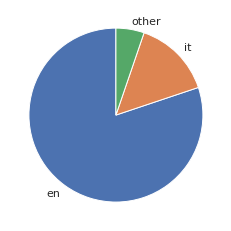

In [ ]:
labels = ["en","it","other"]
sizes = [0,0,0]

for i,(val, cnt) in enumerate(merged_df['lang'].value_counts().iteritems()):
    print('The value {:>7} was found {:>7} times '.format(*[val, cnt]))
    if(val=="en" or val=="it"):
      sizes[i] = cnt
    else:
      sizes[2] += cnt

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90)

plt.show()

## Pairwise Correlation
DA FARE

MATRICI DI CORRELAZIONE ED ENTROPIA - DENNY

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348571 entries, 7158 to 10861362
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   retweet_count   348571 non-null  int64         
 1   reply_count     348571 non-null  int64         
 2   favorite_count  348571 non-null  int64         
 3   num_hashtags    348571 non-null  int64         
 4   num_urls        348571 non-null  int64         
 5   num_mentions    348571 non-null  int64         
 6   created_at_x    348571 non-null  datetime64[ns]
 7   text            348571 non-null  object        
 8   name            348547 non-null  object        
 9   lang            348547 non-null  object        
 10  bot             348547 non-null  float64       
 11  created_at_y    348547 non-null  datetime64[ns]
 12  statuses_count  340511 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(6), object(3)
memory usage: 37.2+ MB
None


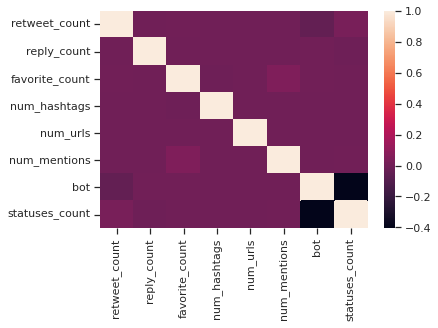

In [ ]:
corr_df = merged_df[merged_df.created_at_x.dt.year == 2019]
corr_df = corr_df[corr_df.created_at_x.dt.month == 4]

corr_df = corr_df.drop(columns=['id', 'user_id'])

print(corr_df.info())
corr = corr_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## SESSO GRATIS

TUTTO QUELLO CHE È QUA SOTTO È IL MIO VECCHIO CODICE NON CANCELLARE, DA MODIFICARE E INTEGRARE CON IL NOTEBOOK

## Checking NaN and duplicates

**DA FARE **

In [ ]:
# covert small_tweets_df columns from object to numeric. If a value can't be converted to integer
# a NaN is inserted

columns = ["user_id", "retweet_count", "reply_count",
           "favorite_count", "num_hashtags",  "num_urls", "num_mentions"]

#counting the number of nan
for col in columns:
 small_tweets_df[col]=pd.to_numeric(small_tweets_df[col], errors='coerce', downcast='integer')

In [ ]:
for col in small_tweets_df.columns:
  print(f"column: {col} NaN: {small_tweets_df[col].isna().sum()}")

In [ ]:
#drop rows with nan values. If any of the value of a row is a nan, the entire row is dropped
small_tweets_df_nona = small_tweets_df.dropna(inplace=False)
#counting the number of nan
for col in small_tweets_df_nona.columns:
  print(f"column: {col} NaN: {small_tweets_df_nona[col].isna().sum()}")

In [ ]:
small_tweets_df_nona.info()

In [ ]:
small_tweets_df_nona = small_tweets_df_nona.astype({
"user_id":int, "retweet_count":int, "reply_count":int,
           "favorite_count":int, "num_hashtags":int,  "num_urls":int, "num_mentions":int    
}, errors="ignore")

In [ ]:
small_tweets_df_nona.info()

In [ ]:
small_tweets_df_nona.describe()

In [ ]:
small_tweets_df_nona.head(10)

In [ ]:
small_tweets_df_nona["user_id"].value_counts()

In [ ]:
plt.yscale("log")
plt.boxplot(small_tweets_df_nona["user_id"].value_counts())

In [ ]:
#drop rows with nan values. If any of the value of a row is a nan, the entire row is dropped
users_df_nona = users_df.dropna(inplace=False)

users_df_nona["lang"].value_counts()

In [ ]:
users_df_nona["lang"].value_counts().plot.bar()

In [ ]:
users_df_nona['month_year'] = users_df_nona['created_at'].dt.to_period('M')
print(users_df_nona['month_year'])

In [ ]:
users_df_nona["month_year"].value_counts().plot.bar()